In [1]:
mproteina_pesada = 1.028*0.05*250 #densidad 0.28g/ml, 5% en peso , disuelta en 250ml
print(mproteina_pesada)

12.85


39.578


,"tiempo, min","volumen Naoh gastado, mL","volumen de base gastado ,L","volumen de bureta, mL",DH
0,0,6.6,0.0066,43.4,8.564936
1,1,9.5,0.0095,40.5,12.328317
2,2,11.6,0.0116,38.4,15.053524
3,3,13.0,0.0130,37.0,16.870329
4,4,14.0,0.0140,36.0,18.168047
5,5,14.7,0.0147,35.3,19.076449
6,6,15.4,0.0154,34.6,19.984851
7,7,16.1,0.0161,33.9,20.893254
8,8,16.5,0.0165,33.5,21.412341
9,9,16.9,0.0169,33.1,21.931428


,pendiente,intercepto,r_value,std_err
0,3.763381,8.564936,1.0,0.0
1,2.725207,9.603110,1.0,0.0
2,1.816805,11.419915,1.0,0.0
3,1.297718,12.977176,1.0,0.0
4,0.908402,14.534437,1.0,0.0
5,0.908402,14.534437,1.0,0.0
6,0.908402,14.534437,1.0,0.0
7,0.519087,17.259644,1.0,0.0
8,0.519087,17.259644,1.0,0.0
9,0.648859,16.091699,1.0,0.0


,"tiempo, min","concentración de sustrato, g/L","ajuste polinómico, g/L","V calculada, g/L*s",R^2
0,0,36.188169,36.185601,1.671803,0.999978
1,1,34.698699,34.706403,1.667912,0.999978
2,2,33.620116,33.612412,1.664021,0.999978
3,3,32.901061,32.903629,1.660130,0.999978


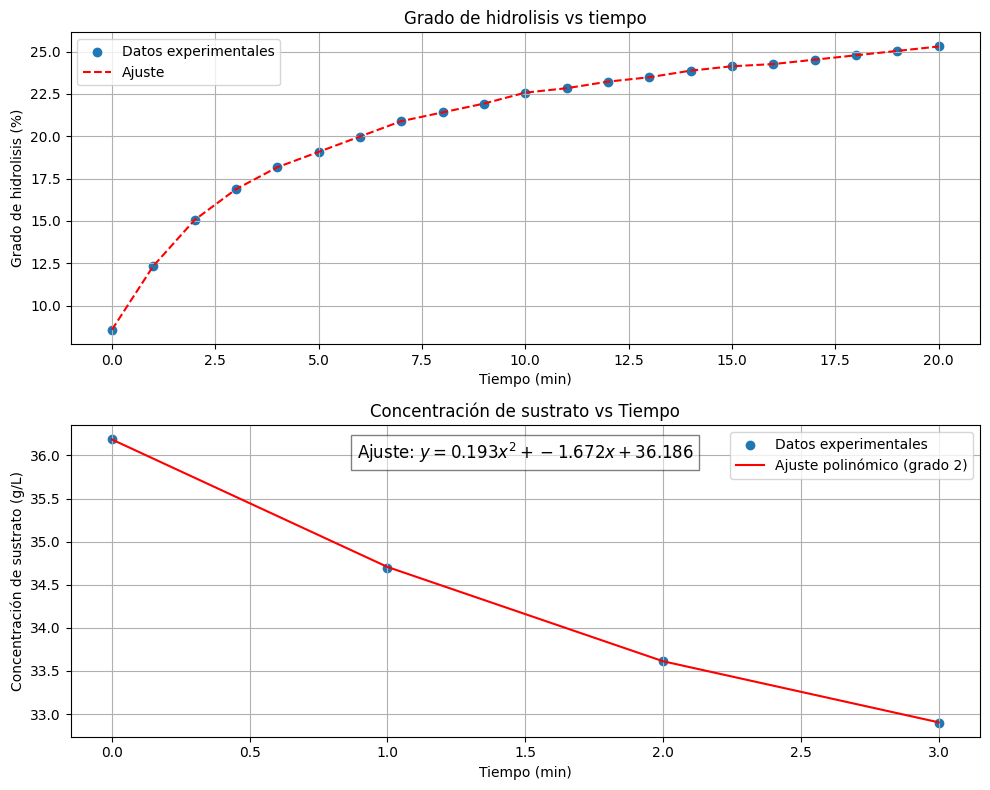

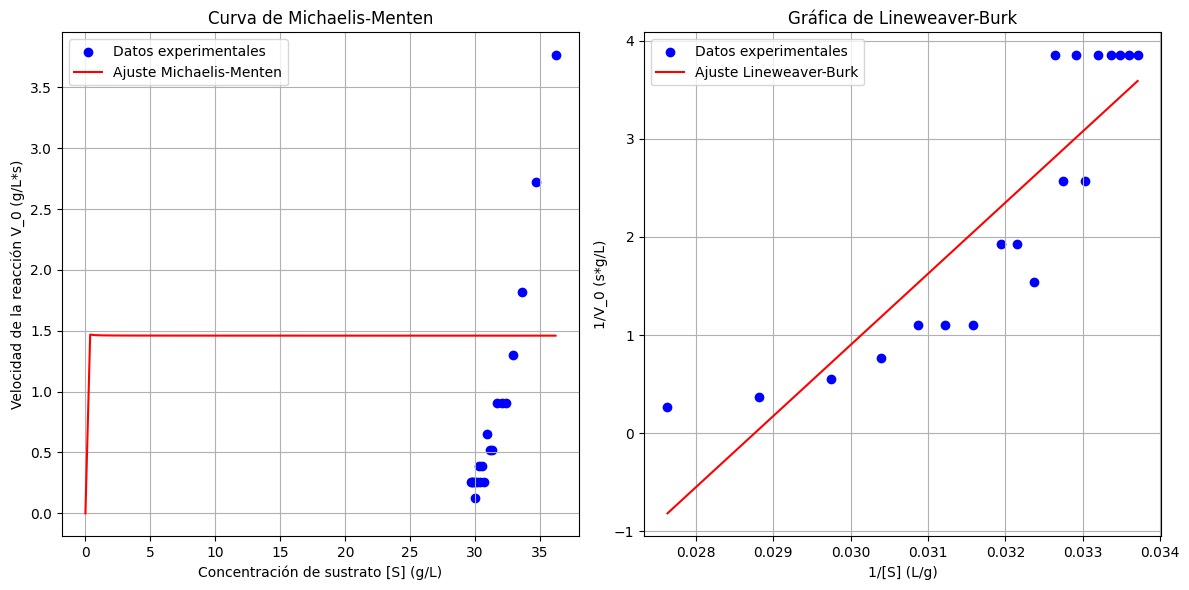

,ajuste,Vmax (g/L*s),Km (g/L)
0,Michaelis-Menten,1.459579,-0.002177
1,Lineweaver-Burk,-0.047935,-34.771223


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from scipy.stats import linregress
from scipy.optimize import curve_fit  # Importar curve_fit

Phi     = 8.18                              # Ph inicial
M_sus   = mproteina_pesada                  #g
C_Naoh  = 1.0                                 # normalidad de la base (determinada por contraste como se indica a continuación)
V_Naoh  = 6.6                               #mL
mp      =  (mproteina_pesada*0.77)/1000     # kg masa de proteína, g (masa pesada • 0,77)
alpha   =  0.885                            # grado de disociación (α = 0,885 para pH = 8 y T = 30-50ºC
h_total =  8.8                              # número de enlaces peptídicos en la proteína (8,8 eq-g/kg)
V_bini  =  50                               # volumen bureta inicial mL
V_mez   =  250                              # volumen de la mezcla, L
C_0     = mproteina_pesada*0.77/(V_mez/1000) # concentración inicial de proteína, g/L
print(C_0)
# Datos tomados

Datos = {
    'tiempo, min' : np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),                       # Lista vacía para el tiempo en segundos
    'volumen Naoh gastado, mL' : np.array([6.6,9.5,11.6,13,14,14.7,15.4,16.1,16.5,16.9,17.4,17.6,17.9,18.1,18.4,18.6,18.7,18.9,19.1,19.3,19.5])        # Lista vacía para volumen de NaOH gastado                      
}
Datos['volumen de base gastado ,L'] = Datos['volumen Naoh gastado, mL'] / 1000
Datos['volumen de bureta, mL'] = V_bini - Datos['volumen Naoh gastado, mL']
Datos['volumen de base gastado ,L'] = np.array(Datos['volumen de base gastado ,L'])
Datos['DH'] = 100 * (Datos['volumen de base gastado ,L'] * C_Naoh) / (alpha * mp * h_total)

pd_datos = pd.DataFrame(Datos)
display(pd_datos)

          
# calculo de pendientes de la gráfica
interceptos = []
r_values = []
pendientes = []
std_errs = []


for i in range(len(Datos['tiempo, min']) - 1):
    # Calcular la pendiente entre el punto i y el punto i+1
    slope, intercept, r_value, _, std_err = linregress(
        Datos['tiempo, min'][i:i+2],  # Dos primeros puntos de tiempo
        Datos['DH'][i:i+2]             # Dos primeros puntos de DH
    )
    pendientes.append(slope)  # Almacenar la pendiente
    interceptos.append(intercept)
    r_values.append(r_value)
    std_errs.append(std_err)
pendientes = np.array(pendientes)

# Crear un DataFrame con las pendientes calculadas
pd_calculo = pd.DataFrame({
    'pendiente': pendientes,
    'intercepto': interceptos,
    'r_value': r_values,
    'std_err': std_errs
})
display(pd_calculo)
# Calcular masa de proteína hidrolizada

velocidades_iniciales = []
concentraciones_sustrato = []
# Calcular concentración de sustrato remanente
V_reactor = 250  # Volumen del reactor en ml
concentraciones_sustrato  = C_0 * (1-Datos['DH']/100 )
velocidades_iniciales = pd_calculo['pendiente'].values * C_0 / 100
concentraciones_sustrato = concentraciones_sustrato[:-1]

# Definir la ecuación de Michaelis-Menten
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

polinomio = np.polyfit(Datos['tiempo, min'][:4], concentraciones_sustrato[:4], 2) # Ajustar los primeros 4 puntos a un polinomio de grado 2
polinomio_derivado = np.polyder(polinomio) # Derivar el polinomio para obtener la velocidad 
Cini = np.linspace(0, 1, 100) # Crear un array de tiempo para ajustar la velocidad
Vini =abs( np.polyval(polinomio_derivado, Cini) )# Evaluar la derivada en t=0 para ajustar michaelis-menten
ajuste = np.polyval(polinomio, Datos['tiempo, min'][:4]) # Evaluar el polinomio ajustado en los primeros 4 puntos
SS_res = np.sum((concentraciones_sustrato[:4] - ajuste) ** 2)
SS_tot = np.sum((concentraciones_sustrato[:4] - np.mean(concentraciones_sustrato[:4])) ** 2)
R2 = 1 - (SS_res / SS_tot)
pd_ajuste = pd.DataFrame({
    'tiempo, min': Datos['tiempo, min'][:4],
    'concentración de sustrato, g/L': concentraciones_sustrato[:4],
    'ajuste polinómico, g/L': ajuste,
    'V calculada, g/L*s': Vini[:4],
    'R^2': R2
})
display(pd_ajuste)
# Ajustar los datos a la ecuación de Michaelis-Menten
popt, pcov = curve_fit(michaelis_menten, Cini, Vini) #concentracion inicial y velocidad extrapolada a t0

# Los parámetros ajustados son Vmax y Km
Vmax, Km = popt
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 filas, 1 columna

# Subplot 1: Grado de hidrolisis vs tiempo
axs[0].scatter(Datos['tiempo, min'], Datos['DH'], label='Datos experimentales')
axs[0].plot(Datos['tiempo, min'], Datos['DH'], color='red', linestyle='--', label='Ajuste')
axs[0].set_xlabel('Tiempo (min)')
axs[0].set_ylabel('Grado de hidrolisis (%)')
axs[0].set_title('Grado de hidrolisis vs tiempo')
axs[0].legend()
axs[0].grid(True)

# Gráfico 2: Concentraciones frente al tiempo con el ajuste polinómico
axs[1].scatter(Datos['tiempo, min'][:4], concentraciones_sustrato[:4], label='Datos experimentales')
axs[1].plot(Datos['tiempo, min'][:4], ajuste, color='red', label=f'Ajuste polinómico (grado {2})')
# Crear la cadena de la ecuación del polinomio
a, b, c = polinomio
equation = f'Ajuste: $y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}$'

# Agregar la ecuación a la leyenda
axs[1].legend(loc='best')
axs[1].text(0.5, 0.95, equation, transform=axs[1].transAxes, fontsize=12,
            horizontalalignment='center',
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
axs[1].set_xlabel('Tiempo (min)')
axs[1].set_ylabel('Concentración de sustrato (g/L)')
axs[1].set_title('Concentración de sustrato vs Tiempo')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Calcular los recíprocos de [S] y V_0
inv_S = 1 / concentraciones_sustrato
inv_V0 = 1 / velocidades_iniciales
inv_S = np.delete(inv_S, 15)
inv_V0 = np.delete(inv_V0, 15)

# Ajuste de la línea recta (Lineweaver-Burk)
slope, intercept, r_value, p_value, std_err = linregress(inv_S, inv_V0)

# Obtener Vmax y Km a partir de la pendiente e intercepto
Vmax2 = 1 / intercept
Km2 = slope * Vmax2

# Crear subplots para Michaelis-Menten y Lineweaver-Burk
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfica de Michaelis-Menten (subplot 1)
S_fit = np.linspace(0, max(concentraciones_sustrato), 100)
V_fit = michaelis_menten(S_fit, Vmax, Km)

axs[0].scatter(concentraciones_sustrato, velocidades_iniciales, color='blue', label='Datos experimentales')
axs[0].plot(S_fit, V_fit, color='red', label='Ajuste Michaelis-Menten')
axs[0].set_xlabel('Concentración de sustrato [S] (g/L)')
axs[0].set_ylabel('Velocidad de la reacción V_0 (g/L*s)')
axs[0].set_title('Curva de Michaelis-Menten')
axs[0].legend()
axs[0].grid(True)

# Gráfica de Lineweaver-Burk (subplot 2)
axs[1].scatter(inv_S, inv_V0, label='Datos experimentales', color='blue')
axs[1].plot(inv_S, slope * inv_S + intercept, color='red', label='Ajuste Lineweaver-Burk')
axs[1].set_xlabel('1/[S] (L/g)')
axs[1].set_ylabel('1/V_0 (s*g/L)')
axs[1].set_title('Gráfica de Lineweaver-Burk')
axs[1].legend()
axs[1].grid(True)

# Mostrar las dos gráficas
plt.tight_layout()
plt.show()


#tabla vmax y km

tabla_vmax_km = pd.DataFrame({
    'ajuste': ['Michaelis-Menten', 'Lineweaver-Burk'],
    'Vmax (g/L*s)': [Vmax, Vmax2],
    'Km (g/L)': [Km, Km2]
})
display(tabla_vmax_km)
